# Урок 2. Keras

ЗАДАНИЕ 1

Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. 
Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?  
   

In [1]:
# The full neural network code!
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
def create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,optimizer_par,loss_par,
                 metrics_par,epochs_par,batch_size_par):
    
    # Build the model.        
    model = Sequential()
    
    for i in list_keys:
        if len(layers[i])==3:
            model.add(Dense(layers[i][0], activation=layers[i][1], input_shape=(layers[i][2],)))
        elif len(layers[i])==2:
            model.add(Dense(layers[i][0], activation=layers[i][1]))
        else:
             raise Exception("layers shape exception")
            
            
     
    # Compile the model.
    model.compile(
      optimizer=optimizer_par,
      loss=loss_par,
      metrics=metrics_par,
    )

    # Train the model.
    hist=model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epochs_par,
      batch_size=batch_size_par,
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Save the model to disk.
    model.save_weights('model.h5')

    # Load the model from disk later using:
    # model.load_weights('model.h5')
    
    return model,hist

In [4]:
#изменение количества внутренних слоев

def accuracies_from_inner_layers_counts(inner_layers_counts):
    accuracies=[]    
    for i in inner_layers_counts:
        layers = {1: [64,'relu',test_images.shape[1]]}
        j=0
        while j<i:  
            layers[j+2]=[64,'relu']
            j += 1
        
        layers[j+2]=[10,'softmax']
            
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=5,batch_size_par=32)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies
    




In [5]:
inner_layers_counts=[0,1,2,3,4,5,6,7,8,9,10,11]
accuracies=accuracies_from_inner_layers_counts(inner_layers_counts)
print(accuracies)


Epoch 1/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.3969 - accuracy: 0.8840
Epoch 2/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2884 - accuracy: 0.9161
Epoch 3/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.2476 - accuracy: 0.9296
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2152 - accuracy: 0.9380
Epoch 5/5
10000/10000 [==============================] - 0s 15us/step
Epoch 1/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.3777 - accuracy: 0.8878
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.2419 - accuracy: 0.9279
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1984 - accuracy: 0.9426
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1711 - accuracy: 0.9496
Epoch 5/5
10000/10000 [==============================] - 0s 17us/step
Epoch 1/5
60000/60000 [=====

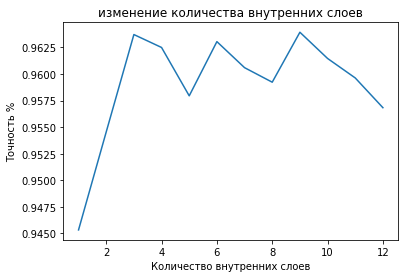

In [6]:
inner_layers_counts=[0+1,1+1,2+1,3+1,4+1,5+1,6+1,7+1,8+1,9+1,10+1,11+1]
plt.plot(inner_layers_counts,accuracies)
plt.title("изменение количества внутренних слоев")
plt.xlabel('Количество внутренних слоев')
plt.ylabel('Точность %')
plt.show()

**Вывод: при увеличении количества внутренних слоев от 1 до 3 точность увеличивается, затем немного уменьшается и далее увеличивается при увеличении количества внутренних слоев от 5 до 6 и далее уменьшается вероятно из-за насыщения.
Т.о. здесь наилучшее число слоев=6**

In [7]:
#изменение количества нейронов слоев
def accuracies_from_neuron_counts(inner_neuron_counts):
    accuracies=[]    
    for i in inner_neuron_counts:
        layers = {1: [i,'relu',test_images.shape[1]],2: [i,'relu'],3: [i,'relu'],4: [i,'relu'],
                  5: [i,'relu'],6: [i,'relu'],7:[10,'softmax']}
        
                            
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=5,batch_size_par=32)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies


In [8]:
neuron_counts=[64,128,512,1024]
accuracies=accuracies_from_neuron_counts(neuron_counts)
print(accuracies)

Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3684 - accuracy: 0.8829
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1929 - accuracy: 0.9398
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1559 - accuracy: 0.9514
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1338 - accuracy: 0.9579
Epoch 5/5
10000/10000 [==============================] - 0s 25us/step
Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3130 - accuracy: 0.9011
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.1585 - accuracy: 0.9513
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.1262 - accuracy: 0.9610
Epoch 4/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1062 - accuracy: 0.9674
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
Epoch 1/5
60000/60000 [=====

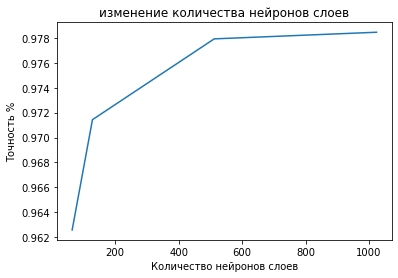

In [9]:
plt.plot(neuron_counts,accuracies)
plt.title("изменение количества нейронов слоев")
plt.xlabel('Количество нейронов слоев')
plt.ylabel('Точность %')
plt.show()

**Вывод: при увеличении количества нейронов в слоях сети от 64 до 512 точность увеличивается, затем немного уменьшается и остается примерно постоянной при увеличении нейронов в слоях сети от 512 и более немного уменьшаясь из-за насыщения.
Т.о. здесь наилучшее число нейронов=512**

In [10]:
#изменяем optimizer - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети (backpropagation)

def accuracies_from_optimizers(optimizers):
    accuracies=[] 
    layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    for optimizer in optimizers:
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par=optimizer,loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=5,batch_size_par=32)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies

    

In [11]:
optimizers=['SGD','rmsprop','adam','adadelta','adagrad','adamax','nadam','ftrl']
accuracies=accuracies_from_optimizers(optimizers)
print(accuracies)

Epoch 1/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.6141 - accuracy: 0.8154
Epoch 2/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.2228 - accuracy: 0.9330
Epoch 3/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.1604 - accuracy: 0.9503
Epoch 4/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.1262 - accuracy: 0.9613
Epoch 5/5
10000/10000 [==============================] - 0s 48us/step
Epoch 1/5
60000/60000 [==============================] - 10s 172us/step - loss: nan - accuracy: 0.0988
Epoch 2/5
60000/60000 [==============================] - 11s 184us/step - loss: nan - accuracy: 0.0987
Epoch 3/5
60000/60000 [==============================] - 10s 173us/step - loss: nan - accuracy: 0.0987
Epoch 4/5
60000/60000 [==============================] - 10s 175us/step - loss: nan - accuracy: 0.0987
Epoch 5/5
10000/10000 [==============================] - 0s 47us/step
Epoch 1/5
60000/60000 [=

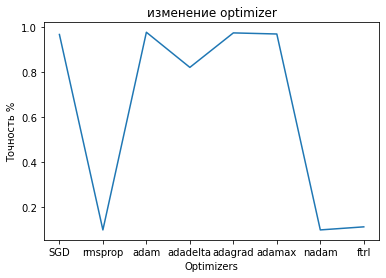

In [12]:
plt.plot(optimizers,accuracies)
plt.title("изменение optimizer")
plt.xlabel('Optimizers')
plt.ylabel('Точность %')
plt.show()

**Вывод: Наибольшее значение точности - для optimizer='SGD','adam','adagrad','adamax'**

In [13]:
#изменяем количество эпох - итераций обучения
def accuracies_from_epochs(epochs):
    accuracies=[] 
    layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    for epoch in epochs:
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=epoch,batch_size_par=32)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies



In [14]:
epochs=[3,5,7,9,12]
accuracies=accuracies_from_epochs(epochs)
print(accuracies)

Epoch 1/3
60000/60000 [==============================] - 12s 208us/step - loss: 0.2836 - accuracy: 0.9116
Epoch 2/3
60000/60000 [==============================] - 13s 210us/step - loss: 0.1332 - accuracy: 0.9598
Epoch 3/3
10000/10000 [==============================] - 1s 57us/step
Epoch 1/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.2859 - accuracy: 0.9119
Epoch 2/5
60000/60000 [==============================] - 12s 198us/step - loss: 0.1333 - accuracy: 0.9599
Epoch 3/5
60000/60000 [==============================] - 12s 208us/step - loss: 0.1018 - accuracy: 0.9689
Epoch 4/5
60000/60000 [==============================] - 13s 214us/step - loss: 0.0837 - accuracy: 0.9744
Epoch 5/5
10000/10000 [==============================] - 1s 73us/step
Epoch 1/7
60000/60000 [==============================] - 13s 214us/step - loss: 0.2898 - accuracy: 0.9107
Epoch 2/7
60000/60000 [==============================] - 12s 207us/step - loss: 0.1371 - accuracy: 0.9599
Epoch 3/7
60

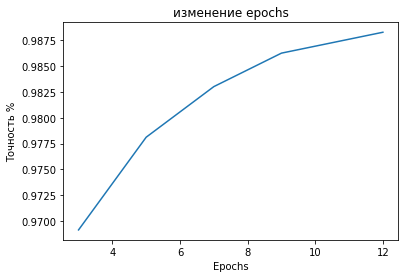

In [15]:
plt.plot(epochs,accuracies)
plt.title("изменение epochs")
plt.xlabel('Epochs')
plt.ylabel('Точность %')
plt.show()

**Вывод: C увеличением количества эпох (определяет сколько раз через нейросеть должен пройти весь набор данных) увеличивается точность**

In [16]:
#изменяем bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения
def accuracies_from_bath_sizes(bath_sizes):
    accuracies=[] 
    layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    for bath_size in bath_sizes:
        list_keys = list(layers.keys())
        list_keys.sort()
        model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=12,batch_size_par=bath_size)

        # Predict on the first 5 test images.
        predictions = model.predict(test_images[:5])
    
        accuracies.append(hist.history.get('accuracy')[-1])

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return accuracies



In [17]:
bath_sizes=[16,32,64,128]
accuracies=accuracies_from_bath_sizes(bath_sizes)
print(accuracies)

Epoch 1/12
60000/60000 [==============================] - 22s 361us/step - loss: 0.3096 - accuracy: 0.9041
Epoch 2/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.1465 - accuracy: 0.9566
Epoch 3/12
60000/60000 [==============================] - 23s 380us/step - loss: 0.1162 - accuracy: 0.9655
Epoch 4/12
60000/60000 [==============================] - 22s 371us/step - loss: 0.0956 - accuracy: 0.9719
Epoch 5/12
60000/60000 [==============================] - 23s 378us/step - loss: 0.0817 - accuracy: 0.9762
Epoch 6/12
60000/60000 [==============================] - 23s 378us/step - loss: 0.0745 - accuracy: 0.9780
Epoch 7/12
60000/60000 [==============================] - 23s 382us/step - loss: 0.0641 - accuracy: 0.9807
Epoch 8/12
60000/60000 [==============================] - 22s 364us/step - loss: 0.0584 - accuracy: 0.9825
Epoch 9/12
60000/60000 [==============================] - 22s 373us/step - loss: 0.0543 - accuracy: 0.9839
Epoch 10/12
60000/60000 [============

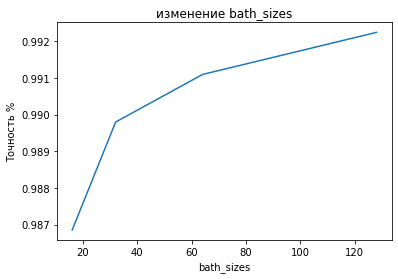

In [18]:
plt.plot(bath_sizes,accuracies)
plt.title("изменение bath_sizes")
plt.xlabel('bath_sizes')
plt.ylabel('Точность %')
plt.show()

**Вывод: C увеличением количества обучающих примеров передающихся нейросети на каждой итерации увеличивается точность  и достигает макимума при bath_size=128 - accuracy=0.992**

In [19]:
def accuracies_for_test_data():
    
    layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    
    list_keys = list(layers.keys())
    list_keys.sort()
    model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=12,batch_size_par=128)

        # Predict on the first 5 test images.
    predictions = model.predict(test_images[:5])
    
    test_loss, test_acc=model.evaluate(
        test_images,
        to_categorical(test_labels)
        )

        # Print our model's predictions.
        #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

        # Check our predictions against the ground truths.
        #print(test_labels[:5]) # [7, 2, 1, 0, 4]
        
    return test_loss, test_acc

In [20]:
test_loss, test_acc=accuracies_for_test_data()
print('test_loss=',test_loss)
print('test_acc=',test_acc)

Epoch 1/12
60000/60000 [==============================] - 7s 109us/step - loss: 0.3286 - accuracy: 0.8963
Epoch 2/12
60000/60000 [==============================] - 6s 107us/step - loss: 0.1217 - accuracy: 0.9630
Epoch 3/12
60000/60000 [==============================] - 6s 106us/step - loss: 0.0876 - accuracy: 0.9722
Epoch 4/12
60000/60000 [==============================] - 6s 107us/step - loss: 0.0699 - accuracy: 0.9778
Epoch 5/12
60000/60000 [==============================] - 7s 110us/step - loss: 0.0574 - accuracy: 0.9821
Epoch 6/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.0488 - accuracy: 0.98440s - l
Epoch 7/12
60000/60000 [==============================] - 7s 112us/step - loss: 0.0405 - accuracy: 0.9875
Epoch 8/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.0356 - accuracy: 0.9883
Epoch 9/12
60000/60000 [==============================] - 7s 109us/step - loss: 0.0305 - accuracy: 0.9901
Epoch 10/12
60000/60000 [===============

**Общий вывод: подбирая параметры сети нужным образом удалось добиться достаточно большой точности на тренировочных данных, в частности этого удалось добиться путем установки следующих параметров: layers_count=7 (6 внутренних), neuron_count=512 (в каждом слое кроме выходного),optimizer='adam',epochs=12, bath_size=128. Точность на тренировочных данных=0.992, на тестовом наборе данных=0.979, что совсем неплохо, хотя есть небольшое переобучение. При этом конечно учитывалось и ограничения по ресурсам.**

Задание 2
    
Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

In [21]:
# Callbacks API - позволяет вызвать ф-ции на различных стадиях обучения
# в частности делать ранние остановы, периодически сохранять на диск логи и модель и т.д.
from keras import callbacks
my_callbacks = [
    callbacks.EarlyStopping(patience=2),
    callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    callbacks.TensorBoard(log_dir='./logs'),
]
#model.fit(dataset, epochs=10, callbacks=my_callbacks)

In [22]:
!pip install pydot

In [23]:
!pip install pydotplus

Epoch 1/2
60000/60000 [==============================] - 5s 82us/step - loss: 0.3043 - accuracy: 0.9042
Epoch 2/2
10000/10000 [==============================] - 1s 78us/step


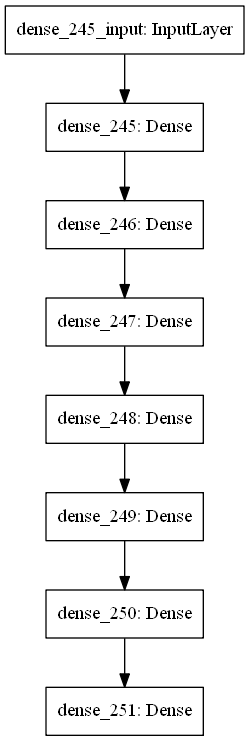

In [24]:
#Также полезны разные утилиты, например utils.plot_model -Converts a Keras model to dot format and save to a file. 
from keras import utils
import pydotplus
from keras.utils.vis_utils import model_to_dot
import pydot
layers = {1: [512,'relu',test_images.shape[1]],2: [512,'relu'],3: [512,'relu'],4: [512,'relu'],
                  5: [512,'relu'],6: [512,'relu'],7:[10,'softmax']}
    
list_keys = list(layers.keys())
list_keys.sort()
model,hist=create_model(train_images, train_labels, test_images,test_labels,layers,list_keys,
                                optimizer_par='adam',loss_par='categorical_crossentropy',metrics_par=['accuracy'],
                                epochs_par=2,batch_size_par=128)

utils.vis_utils.pydot = pydot
utils.plot_model(model, to_file='model.png')

